# hw2trees

*Спасибо великому курсу великого Евгения Соколова*

Выполнено студентом: Долбус Д.А.


### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [27]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [28]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

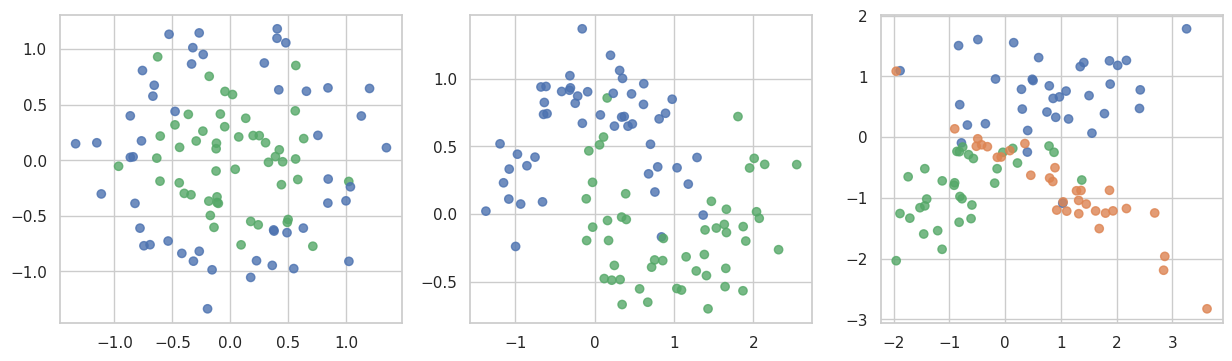

In [29]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [30]:
def plot_surface(clf, X, y, ax=plt):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

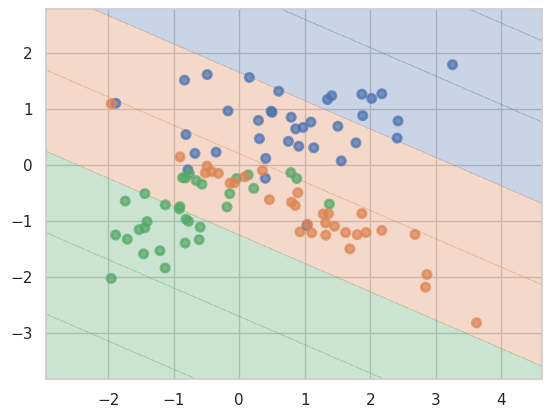

In [31]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

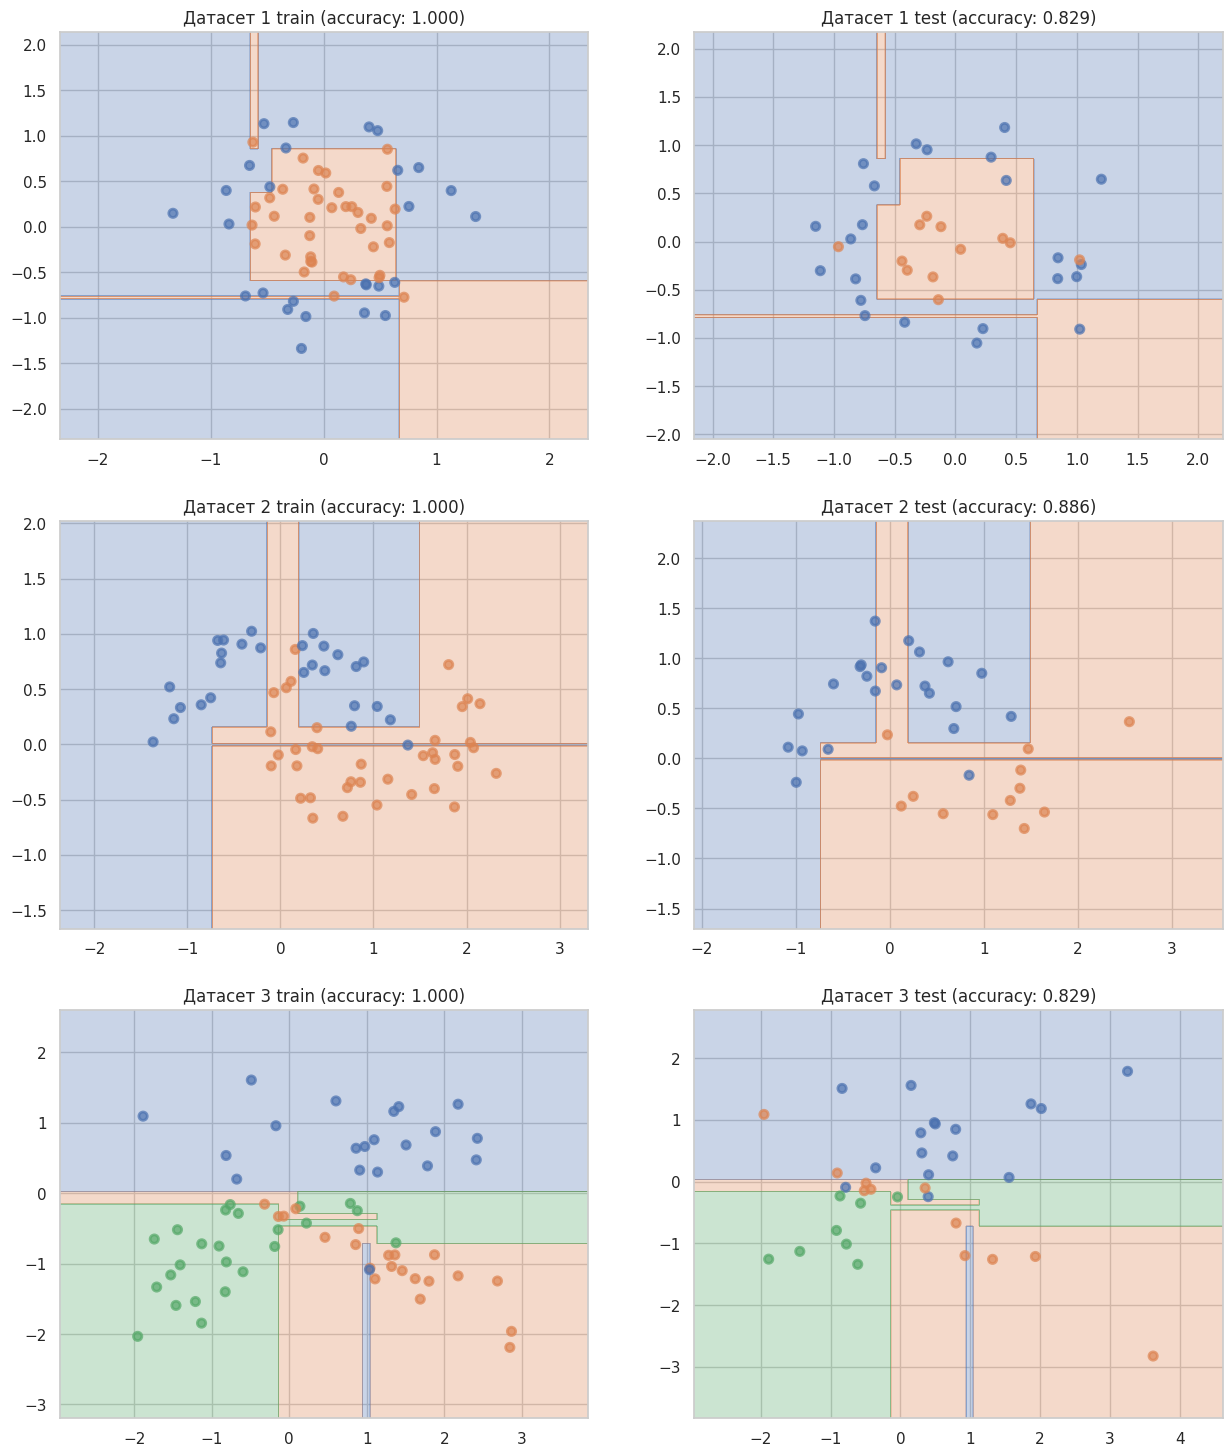

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

i = 0

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc = accuracy_score(y_test, tree.predict(X_test))

    plot_surface(tree, X_train, y_train, axes[i, 0])
    axes[i, 0].set_title(f'Датасет {i+1} train (accuracy: {train_acc:.3f})')

    plot_surface(tree, X_test, y_test, axes[i, 1])
    axes[i, 1].set_title(f'Датасет {i+1} test (accuracy: {test_acc:.3f})')

__Ответ:__ Дерево довольно сильно переобучилось (разница между train и test accuracy в среднем больше 0.15).

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

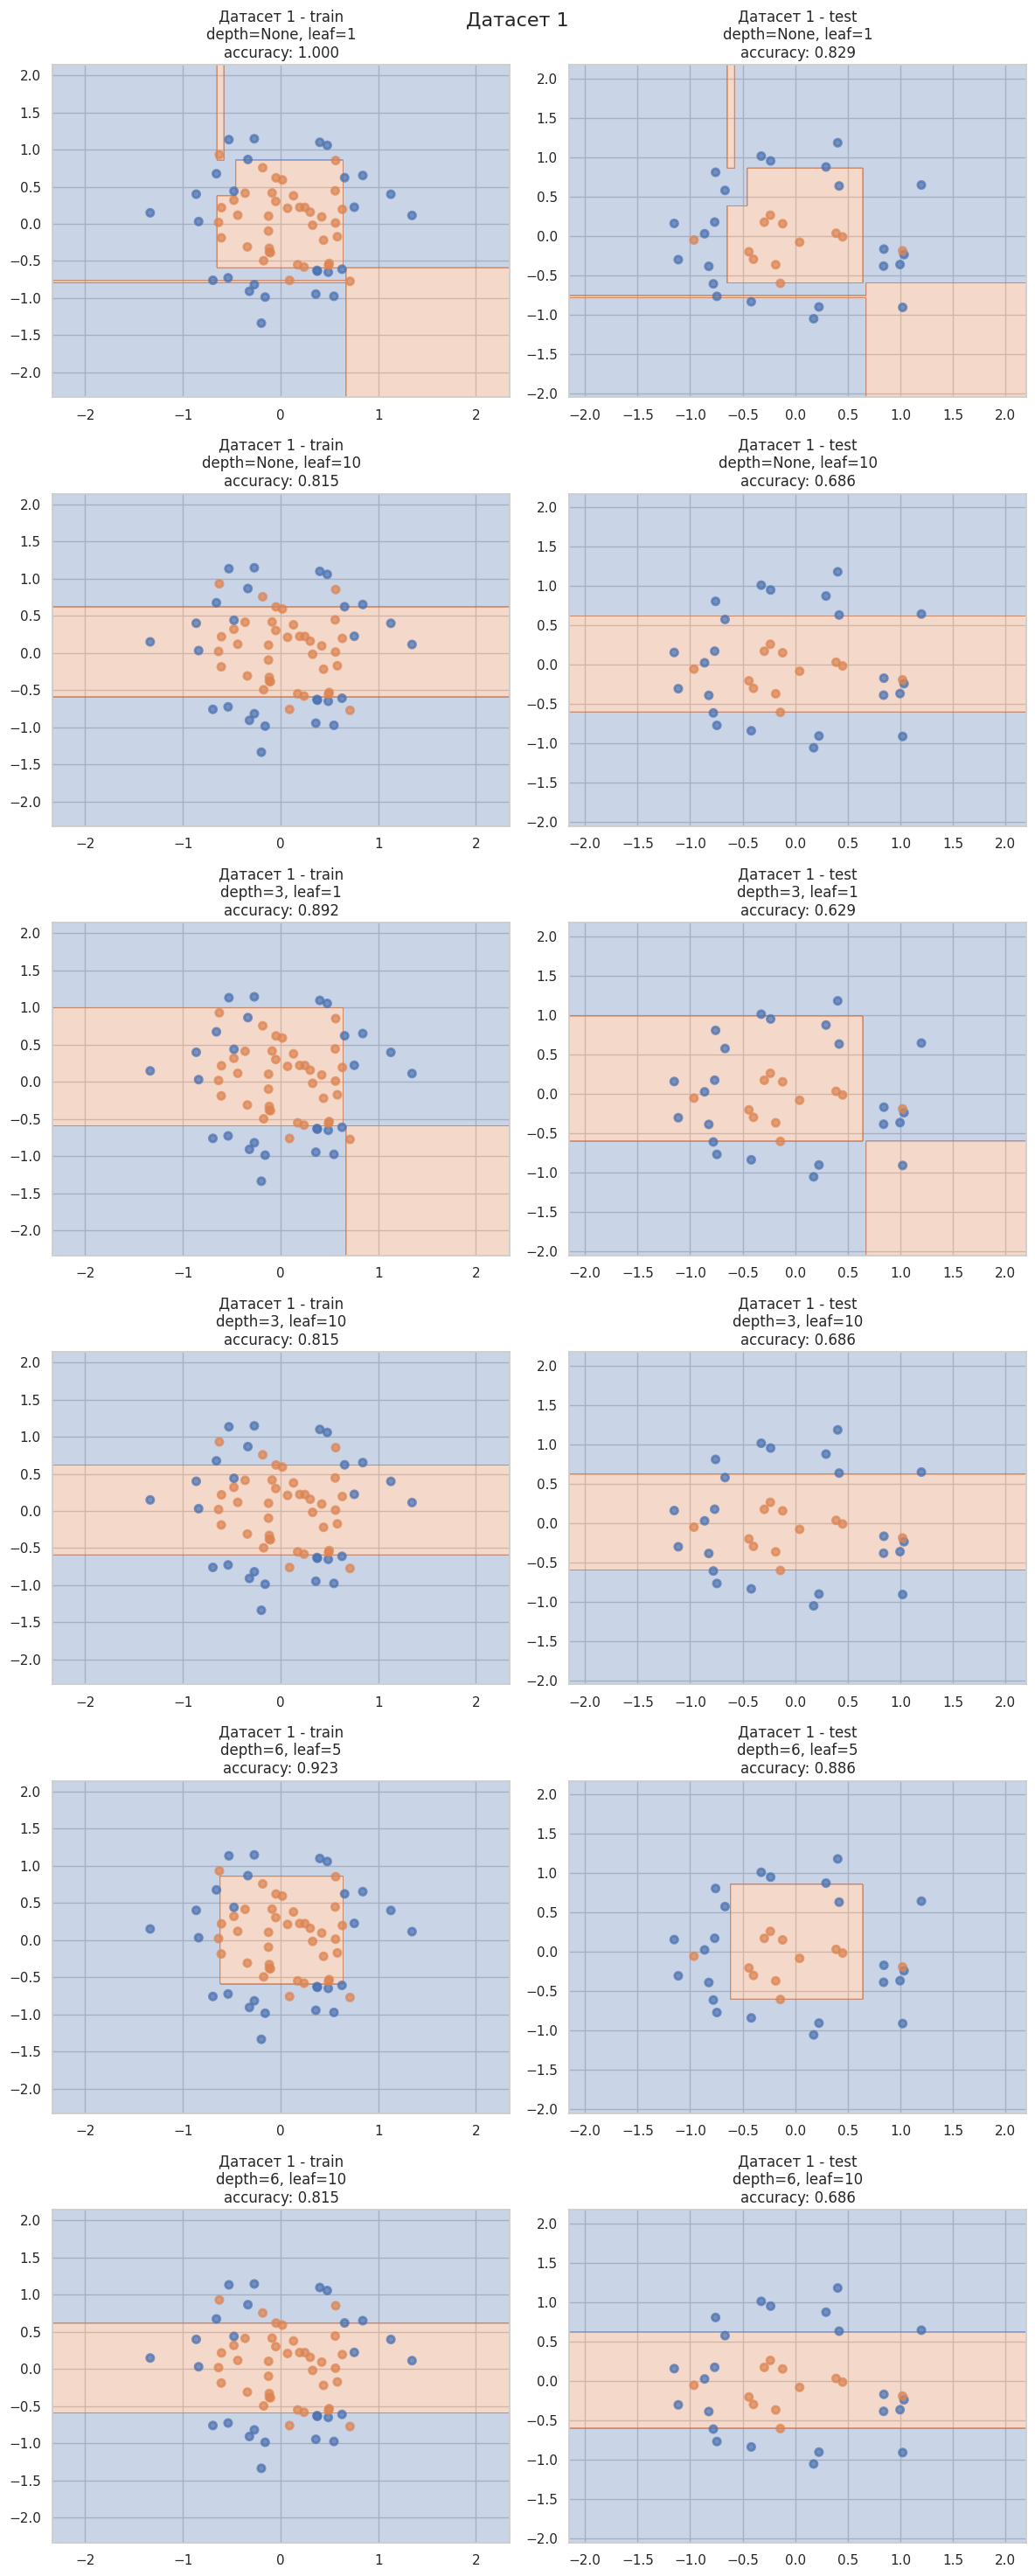

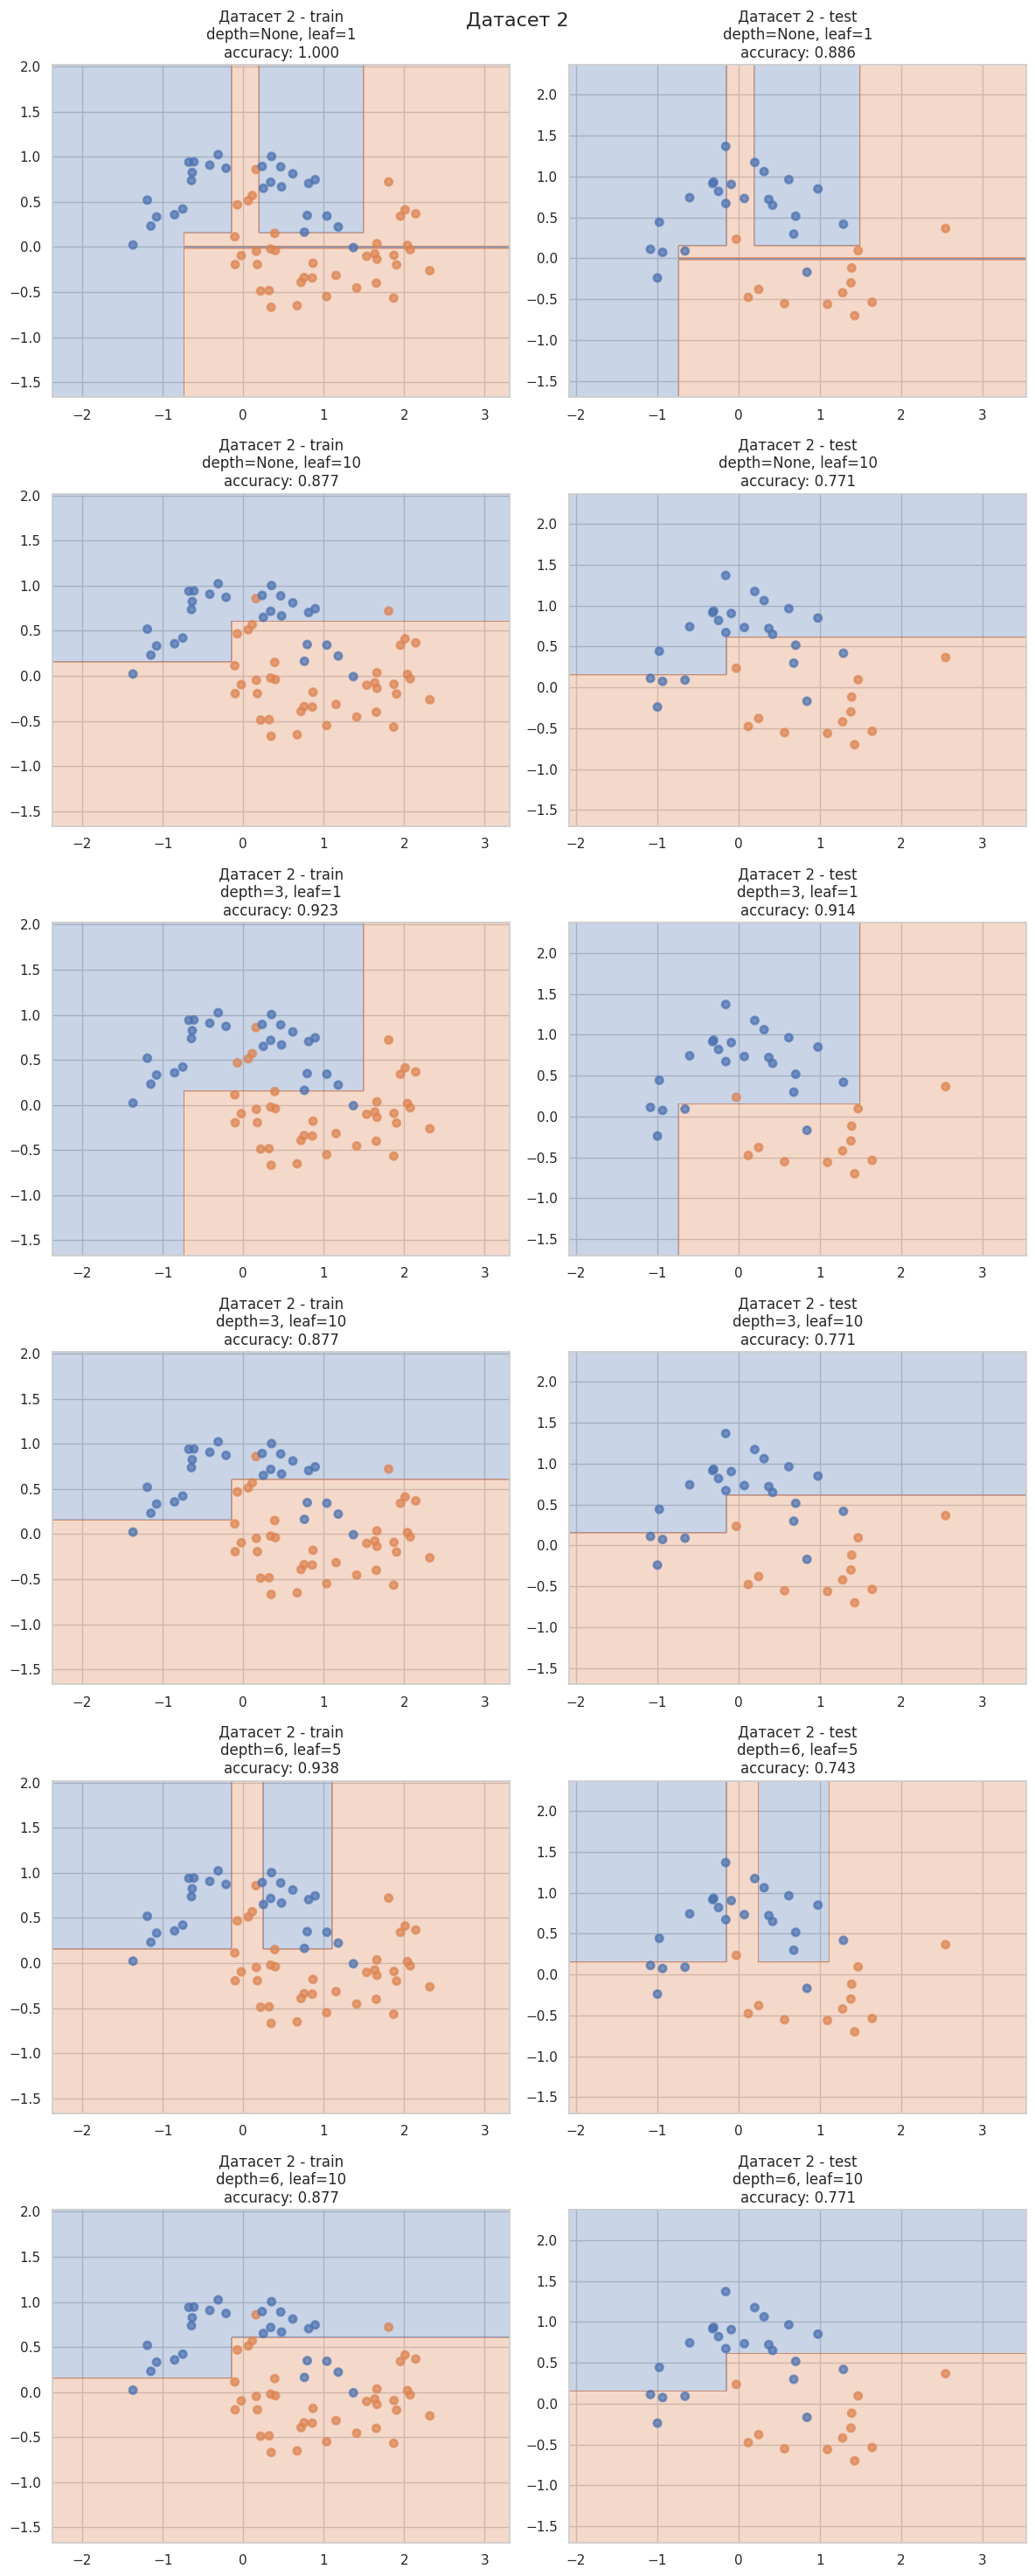

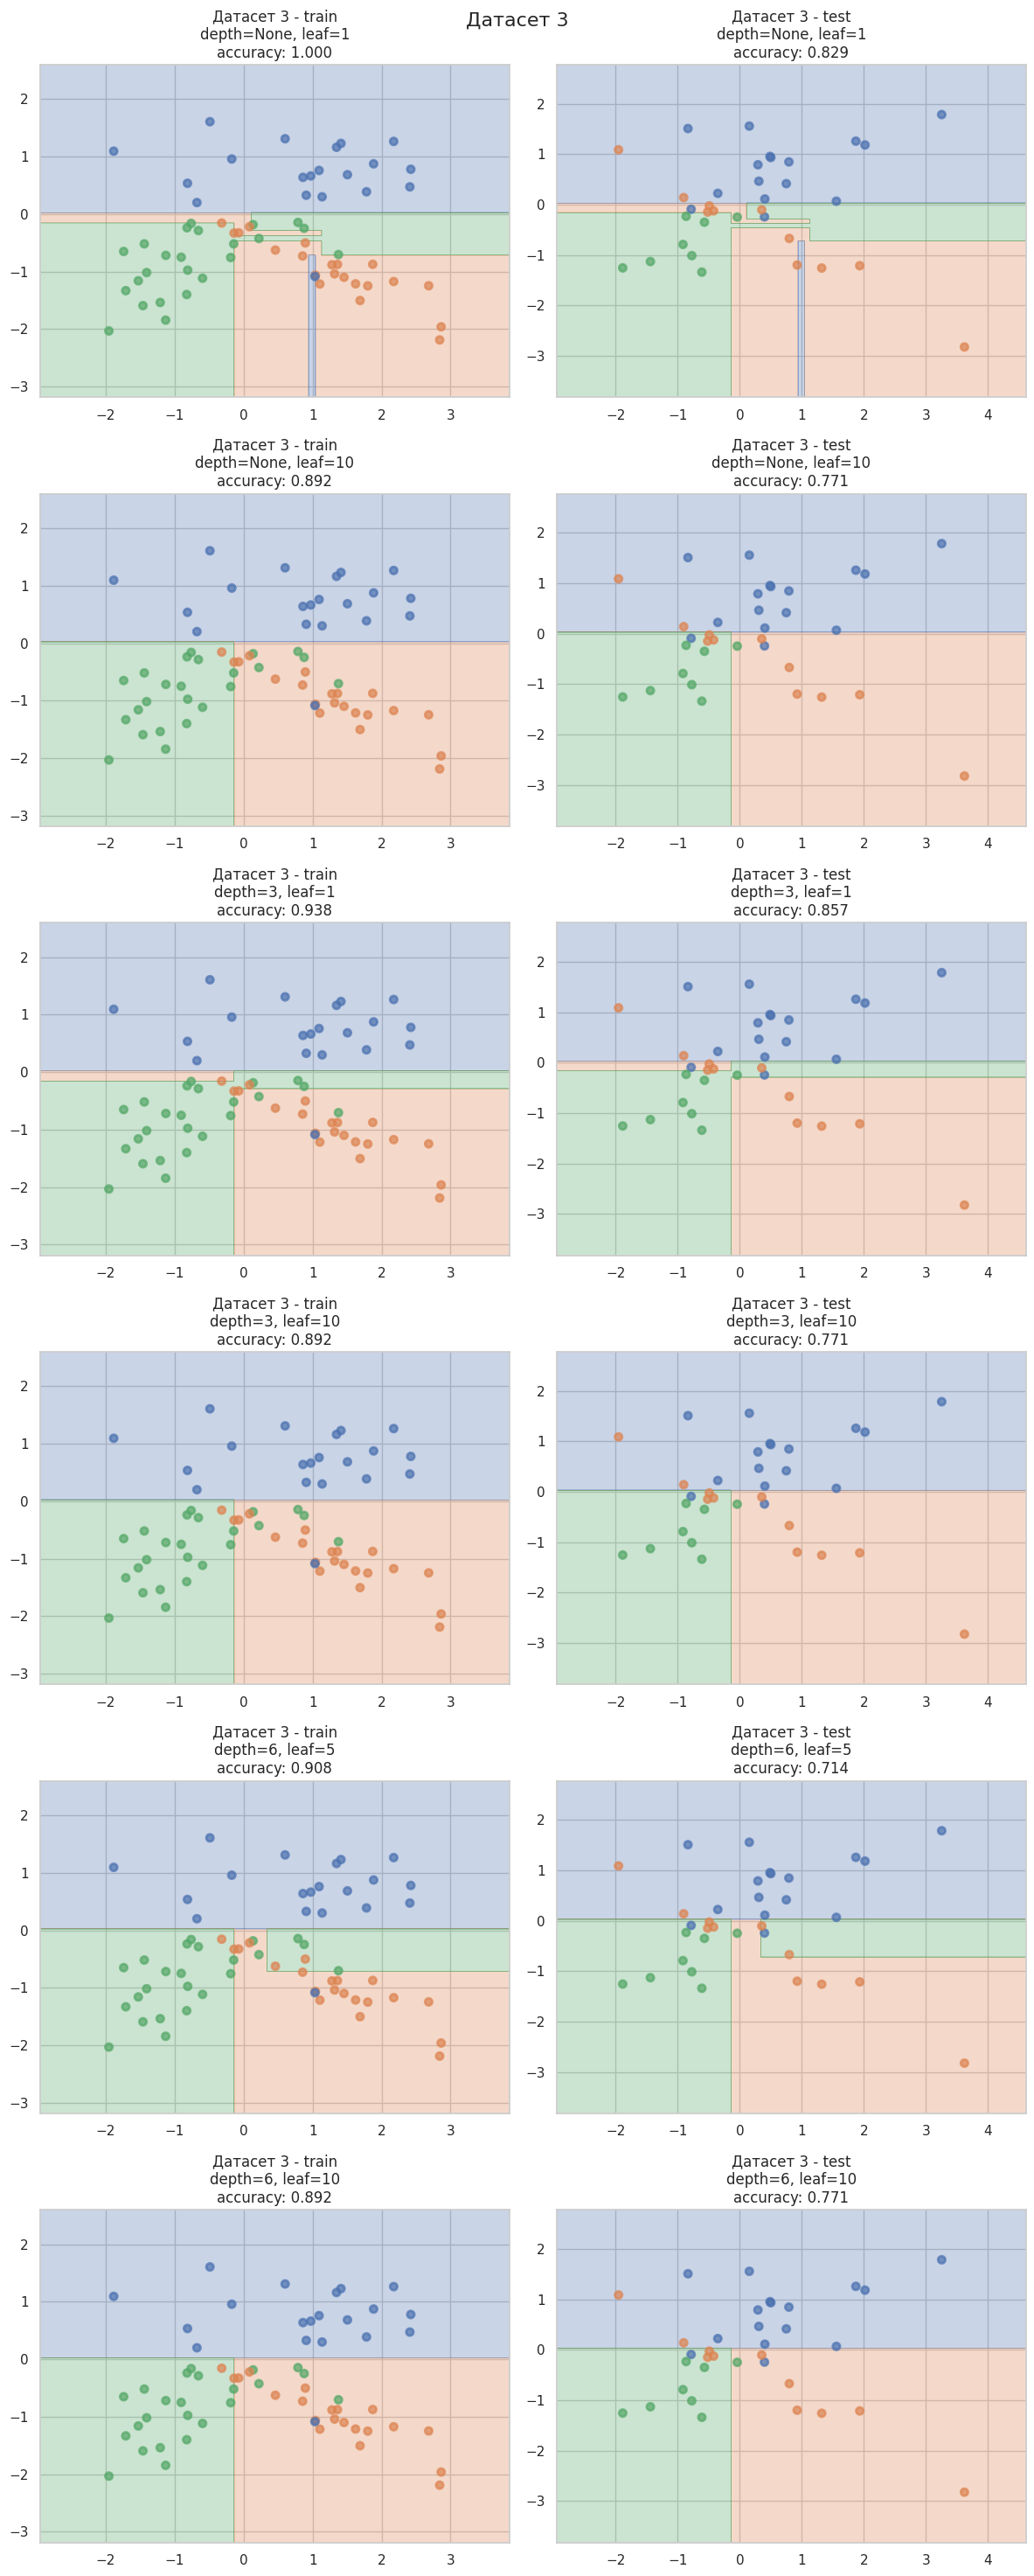

In [33]:
param_combinations = [
    (None, 1),
    (None, 10),
    (3, 1),
    (3, 10),
    (6, 5),
    (6, 10)
]

for data_i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    fig, axes = plt.subplots(len(param_combinations), 2, figsize=(12, 5*len(param_combinations)))

    for i, (depth, leaf) in enumerate(param_combinations):
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=42)
        tree.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, tree.predict(X_train))
        test_acc = accuracy_score(y_test, tree.predict(X_test))

        plot_surface(tree, X_train, y_train, axes[i, 0])
        axes[i, 0].set_title(f'Датасет {data_i+1} - train\ndepth={depth}, leaf={leaf}\naccuracy: {train_acc:.3f}')


        plot_surface(tree, X_test, y_test, axes[i, 1])
        axes[i, 1].set_title(f'Датасет {data_i+1} - test\ndepth={depth}, leaf={leaf}\naccuracy: {test_acc:.3f}')


    plt.suptitle(f'Датасет {data_i+1}', fontsize=16)
    plt.tight_layout()


__Ответ:__ Большая глубина позволяет модели лучше подстраиваться под разнообразность датасета, но из-за этого более склонна к выбросам при обучении, что сильно портит точность на тренировочной выборке. Малое min_samples_leaf позволяет выделять определенные признаки, но так же из-за этого склонно к переобучению. Выбор гиперпараметров очень сильно зависит от задачи и необходимо правильно их подбирать на определенном датасете, чтобы получить высокую точность на обеих выборках. Например, на 1 датасете лучше обучается модель со средней глубиной и количеством листьев, но на других датасетах она слишком сильно переобучается.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [34]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    feature_vector = np.array(feature_vector)
    target_vector = np.array(target_vector)

    sorted_indices = np.argsort(feature_vector)
    feat_sorted = feature_vector[sorted_indices]
    target_sorted = target_vector[sorted_indices]

    valid_split_mask = feat_sorted[:-1] != feat_sorted[1:]

    if not np.any(valid_split_mask):
        return np.array([]), np.array([]), None, None

    thresholds = (feat_sorted[:-1] + feat_sorted[1:]) / 2.0

    N = len(target_vector)

    target_cumsum = np.cumsum(target_sorted)

    r_l_sizes = np.arange(1, N)
    r_r_sizes = N - r_l_sizes

    s_l = target_cumsum[:-1]
    s_r = target_cumsum[-1] - s_l

    p1_l = s_l / r_l_sizes
    p0_l = 1 - p1_l

    p1_r = s_r / r_r_sizes
    p0_r = 1 - p1_r

    h_l = 1 - (p1_l ** 2 + p0_l ** 2)
    h_r = 1 - (p1_r ** 2 + p0_r ** 2)

    Q = - (r_l_sizes / N) * h_l - (r_r_sizes / N) * h_r

    thresholds = thresholds[valid_split_mask]
    ginis = Q[valid_split_mask]

    best_idx = np.argmax(ginis)
    threshold_best = thresholds[best_idx]
    gini_best = ginis[best_idx]

    return thresholds, ginis, threshold_best, gini_best

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [35]:
studs = pd.read_csv('students.csv')

In [36]:
studs.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
5,0.09,0.15,0.40,0.10,0.66,1
6,0.10,0.10,0.43,0.29,0.56,1
7,0.15,0.02,0.34,0.40,0.01,0
8,0.20,0.14,0.35,0.72,0.25,0
9,0.00,0.00,0.50,0.20,0.85,1


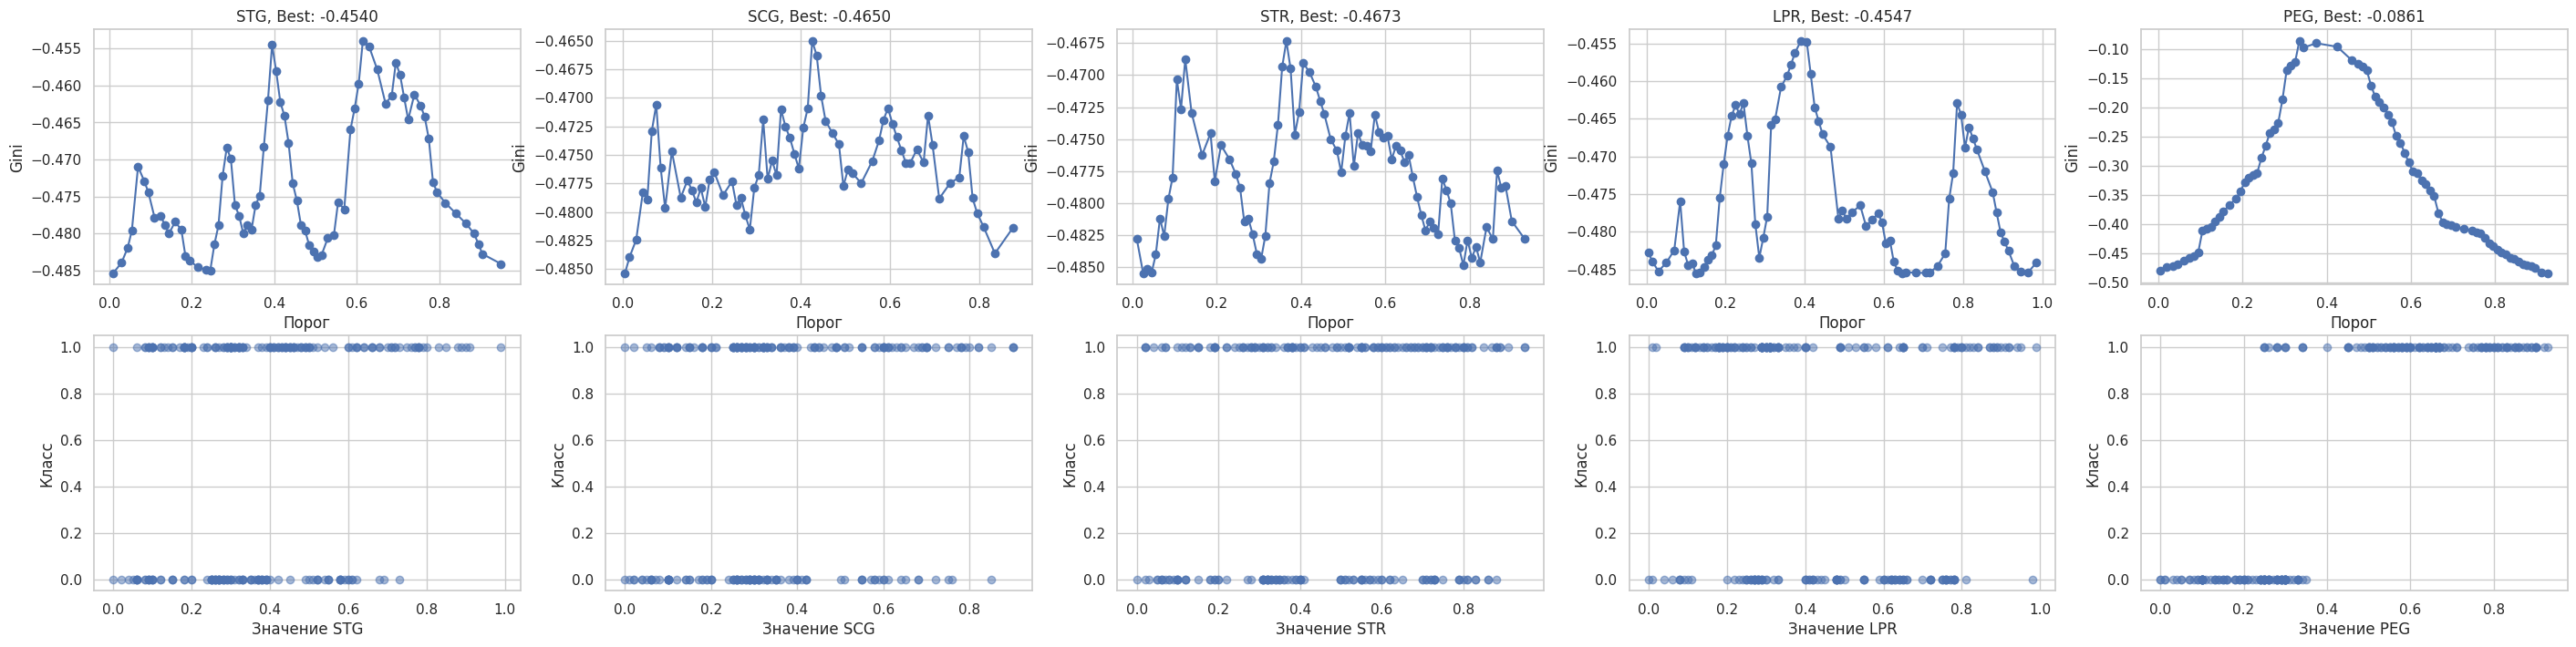

In [37]:
X = studs.iloc[:, :-1].values
y = studs.iloc[:, -1].values

fig, axes = plt.subplots(2, 5, figsize=(35, 8))
feature_names = studs.columns[:-1]

for i in range(5):
    feature_vector = X[:, i]
    thresholds, ginis, _, best_gini = find_best_split(feature_vector, y)

    axes[0, i].plot(thresholds, ginis, 'o-')
    axes[0, i].set_title(f'{feature_names[i]}, Best: {best_gini:.4f}')
    axes[0, i].set_xlabel('Порог')
    axes[0, i].set_ylabel('Gini')

    axes[1, i].scatter(feature_vector, y, alpha=0.5)
    axes[1, i].set_xlabel(f'Значение {feature_names[i]}')
    axes[1, i].set_ylabel('Класс')


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Критерий достигает лучшего значения Gini в -0.0861 и резко падает, что говорит о хорошем разделении классов. На scatter-графике PEG также видно четкое разделение на классы при значении PEG около 0.38.
Хорошие кривые имеют четкий пик и резкое падение по сторонам от пика, на плохих кривых много колебаний или просто плоский график, из-за чего непонятно где именно нужно разделять выборку.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [83]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf


    def get_params(self, deep=True):
        return {
            'feature_types': self._feature_types,
            'max_depth': self._max_depth,
            'min_samples_split': self._min_samples_split,
            'min_samples_leaf': self._min_samples_leaf
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if (self._max_depth is not None and depth >= self._max_depth) or \
           (self._min_samples_split is not None and len(sub_y) < self._min_samples_split) or \
           np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature].astype(float)
            elif feature_type == "categorical":
                feature_vector = sub_X[:, feature]
                counts = Counter(feature_vector)
                clicks = Counter(feature_vector[sub_y == 1])
                ratio = {}
                for key, current_count in counts.items():
                    current_click = clicks.get(key, 0)
                    ratio[key] = current_click / current_count if current_count > 0 else 0

                sorted_categories = [x[0] for x in sorted(ratio.items(), key=lambda x: x[1])]
                categories_map = {cat: i for i, cat in enumerate(sorted_categories)}
                feature_vector = np.array([categories_map[x] for x in feature_vector])
            else:
                raise ValueError

            if len(np.unique(feature_vector)) <= 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            if gini is None:
                continue

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                if feature_type == "real":
                    threshold_best = threshold
                    split = sub_X[:, feature].astype(float) < threshold
                elif feature_type == "categorical":
                    threshold_best = [cat for cat in categories_map if categories_map[cat] < threshold]
                    split = np.array([x in threshold_best for x in sub_X[:, feature]])

        if feature_best is None or (self._min_samples_leaf is not None and
                                   (np.sum(split) < self._min_samples_leaf or
                                    np.sum(~split) < self._min_samples_leaf)):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
          raise ValueError

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_idx = node["feature_split"]
        feature_type = self._feature_types[feature_idx]

        if feature_type == "real":
            if x[feature_idx] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif feature_type == "categorical":
            if x[feature_idx] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [84]:
mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)

le = LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = le.fit_transform(mushrooms[col])

In [85]:
X_mush = mushrooms.iloc[:, 1:].values
y_mush = mushrooms.iloc[:, 0].values

In [86]:
X, y

(array([[2, 3, 0, ..., 0, 0, 2],
        [2, 3, 0, ..., 0, 0, 1],
        [2, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 4, 2, ..., 1, 1, 2],
        [0, 4, 2, ..., 1, 1, 1],
        [0, 4, 2, ..., 1, 1, 0]], dtype=object),
 array([0, 1, 0, ..., 1, 1, 0]))

In [87]:
split_idx = len(X) // 2
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [88]:
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [65]:
tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')
X_tic = tic_tac_toe.iloc[:, :-1].values
y_tic = tic_tac_toe.iloc[:, -1].values


In [66]:
le = LabelEncoder()
for i in range(X_tic.shape[1]):
    X_tic[:, i] = le.fit_transform(X_tic[:, i])
y_tic = le.fit_transform(y_tic)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_tic, y_tic, test_size=0.3, random_state=42)

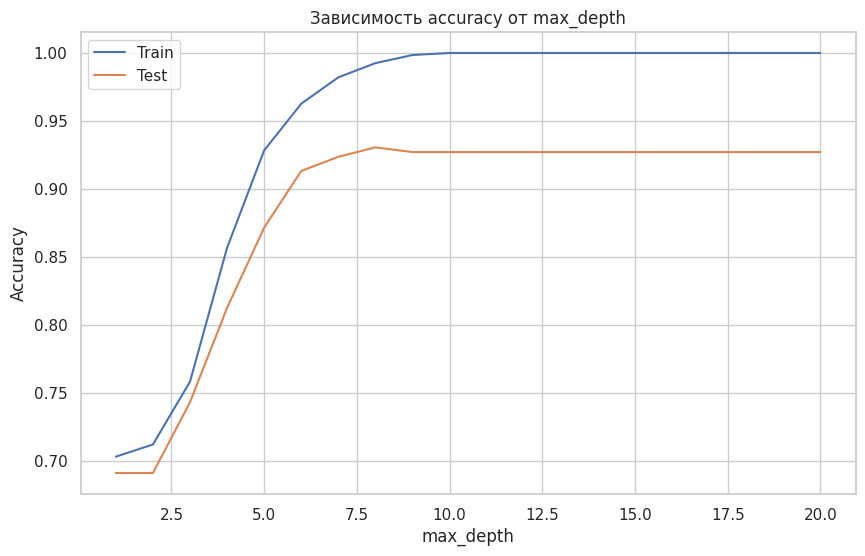

In [68]:
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    tree = DecisionTree(feature_types=['categorical'] * X_train.shape[1], max_depth=depth)
    tree.fit(X_train, y_train)

    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)

    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Зависимость accuracy от max_depth')
plt.legend()
plt.grid(True)

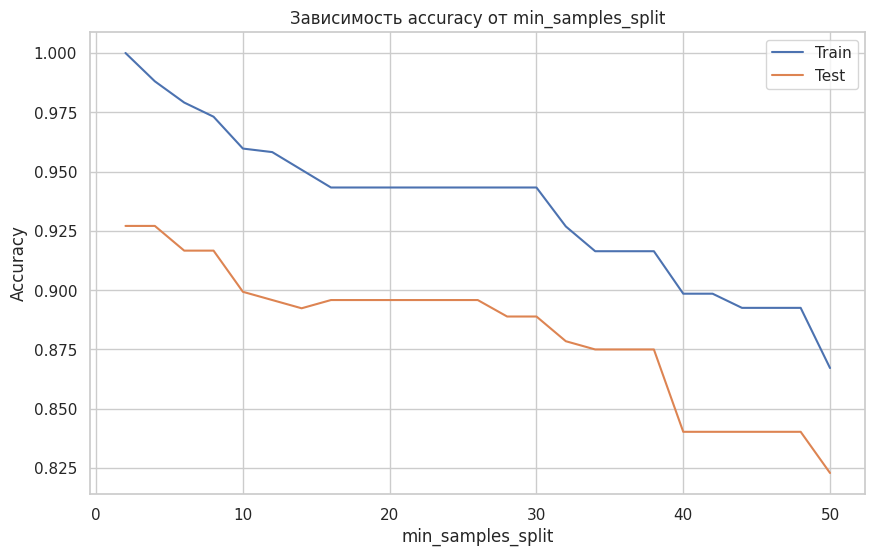

In [69]:
splits = range(2, 51, 2)
train_scores_split = []
test_scores_split = []

for split in splits:
    tree = DecisionTree(feature_types=['categorical'] * X_train.shape[1], min_samples_split=split)
    tree.fit(X_train, y_train)

    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)

    train_scores_split.append(accuracy_score(y_train, train_pred))
    test_scores_split.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(splits, train_scores_split, label='Train')
plt.plot(splits, test_scores_split, label='Test')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Зависимость accuracy от min_samples_split')
plt.legend()
plt.grid(True)

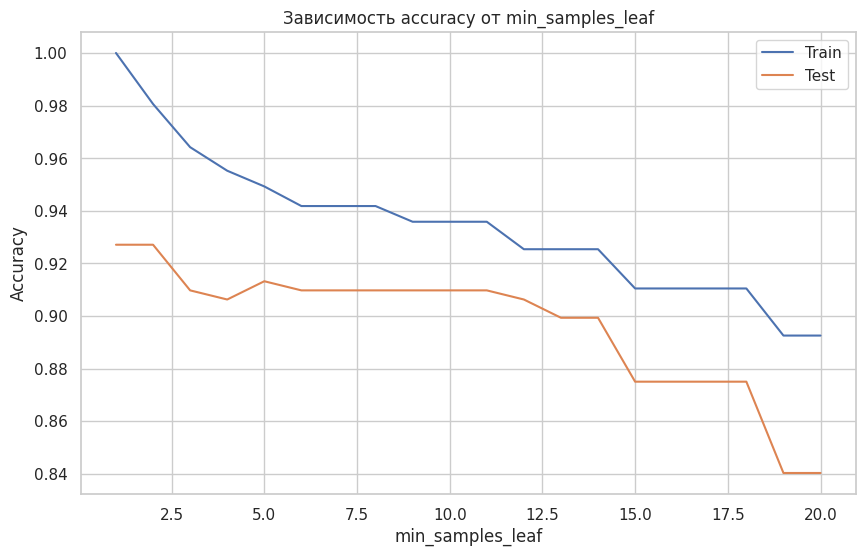

In [70]:
leaves = range(1, 21)
train_scores_leaf = []
test_scores_leaf = []

for leaf in leaves:
    tree = DecisionTree(feature_types=['categorical'] * X_train.shape[1], min_samples_leaf=leaf)
    tree.fit(X_train, y_train)

    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)

    train_scores_leaf.append(accuracy_score(y_train, train_pred))
    test_scores_leaf.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(leaves, train_scores_leaf, label='Train')
plt.plot(leaves, test_scores_leaf, label='Test')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Зависимость accuracy от min_samples_leaf')
plt.legend()
plt.grid(True)

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [71]:
!pip install ucimlrepo

In [72]:
cars_coding = {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}
nurs_coding = {'not_recom': 0, 'recommend': 0, 'priority': 1, 'very_recom': 1, 'spec_prior': 1}

In [73]:
from ucimlrepo import fetch_ucirepo

cars = fetch_ucirepo(id=19)


X_cars = cars.data.features
y_cars = cars.data.targets

y_cars = np.array([cars_coding.get(label[0]) for label in y_cars.values.tolist()])

In [74]:
nursery = fetch_ucirepo(id=76)

X_nursery = nursery.data.features
y_nursery = nursery.data.targets

y_nursery = np.array([nurs_coding.get(label[0]) for label in y_nursery.values.tolist()])

In [75]:
le = LabelEncoder()
y_tic = le.fit_transform(y_tic)

X_cars = X_cars.to_numpy()
X_nursery = X_nursery.to_numpy()

for i in range(X_tic.shape[1]):
    X_tic[:, i] = le.fit_transform(X_tic[:, i])

for i in range(X_cars.shape[1]):
    X_cars[:, i] = le.fit_transform(X_cars[:, i])

for i in range(X_nursery.shape[1]):
    X_nursery[:, i] = le.fit_transform(X_nursery[:, i])

In [76]:
X_nursery

array([[2, 3, 0, ..., 0, 0, 2],
       [2, 3, 0, ..., 0, 0, 1],
       [2, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 2, ..., 1, 1, 2],
       [0, 4, 2, ..., 1, 1, 1],
       [0, 4, 2, ..., 1, 1, 0]], dtype=object)

In [77]:
datasets = ((X_mush, y_mush), (X_tic, y_tic), (X_cars, y_cars), (X_nursery, y_nursery))

In [78]:
datasets[3][0]

array([[2, 3, 0, ..., 0, 0, 2],
       [2, 3, 0, ..., 0, 0, 1],
       [2, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 2, ..., 1, 1, 2],
       [0, 4, 2, ..., 1, 1, 1],
       [0, 4, 2, ..., 1, 1, 0]], dtype=object)

In [79]:
results = pd.DataFrame()

dataset_strs = ['mushrooms', 'tic_tac_toe', 'cars', 'nursery']

for i, (X, y) in enumerate(datasets):
  hotenc = OneHotEncoder(sparse_output=False)
  X_hot = hotenc.fit_transform(X)

  real_feat = cross_val_score(DecisionTree(feature_types=['real'] * X.shape[1]), X, y, cv=10, scoring=make_scorer(accuracy_score))
  category_feat = cross_val_score(DecisionTree(feature_types=['categorical'] * X.shape[1]), X, y, cv=10, scoring=make_scorer(accuracy_score))
  real_hot_feat = cross_val_score(DecisionTree(feature_types=['categorical'] * X_hot.shape[1]), X_hot, y, cv=10, scoring=make_scorer(accuracy_score))
  skl_tree_feat = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring=make_scorer(accuracy_score))

  results[dataset_strs[i]] = (real_feat, category_feat, real_hot_feat, skl_tree_feat)


In [80]:
results = results.T
results.columns = ['real', 'categorical', 'real with OHE', 'skl tree']

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

In [81]:
results.map(lambda x: x.mean())

,real,categorical,real with OHE,skl tree
mushrooms,0.999261,1.000000,0.999631,0.961123
tic_tac_toe,0.467533,0.541458,0.543575,0.762292
cars,0.942647,0.967546,0.919495,0.942707
nursery,0.999691,0.999846,0.999537,0.999691


In [82]:
results.map(lambda x: x.mean())

,real,categorical,real with OHE,skl tree
mushrooms,0.999261,1.000000,0.999631,0.961123
tic_tac_toe,0.467533,0.541458,0.543575,0.762292
cars,0.942647,0.967546,0.919495,0.942707
nursery,0.999691,0.999846,0.999537,0.999691


**Ответ:** Вещественный с OHE лучше всех среди наших деревьев работает с крестиками-ноликами, но категориальный лучше всех алгоритмов работает на остальных наборах данных.

Категориальный работает лучше на mushrooms, cars, nursery, потому что там большинство/все признаков - категориальные, а в крестиках-ноликах очень хорошо представлять в ячейках числа.

Возможно, случайным является порядок признаков и он влияет на само обучение
модели. В документации sklearn даже есть параметр random_state, который отвечает за сид генератора рандомных чисел.


Вставьте что угодно, описывающее ваши впечатления от этого задания: довольно интересно анализировать датасеты и обучать модели, нравятся именно практические задачи, где есть что потыкать, посмотреть